# Porfolio Project

Breast Cancer Wisconsin dataset (load_breast_cancer) — binary classification (malignant vs benign).

In [2]:
!pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.7 MB 851.2 kB/s eta 0:00:10
   --- ------------------------------------ 0.8/8.7 MB 854.3 kB/s eta 0:00:10
   --- ------------------------------------ 0.8/8.7 MB 854.3 kB/s eta 0:00:10
   --- ------------------------------------ 0.8/8.7 MB 854.3 kB/s eta 0:00:10
   ---- ----------------------------------- 1.0/8.7 MB 697.5 kB/s eta 0:00:11
   ------ --------------------------------- 1.3/8.7 MB 786.4 kB/s eta 0:00:10
   -------- ------------------------------- 1.8/8.7 MB 907.4 kB/s eta 0:00:08
   --------- ------------------------------ 2.1/8.7 MB 964.3 kB/s eta 0:00:07
   ---------- --------


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    roc_auc_score, RocCurveDisplay, PrecisionRecallDisplay,
    ConfusionMatrixDisplay, classification_report
)

import joblib 

In [4]:
#Load data

data = load_breast_cancer()
X = data.data
y = data.target

feature_names = data.feature_names

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("Target classes:", data.target_names)

#Quick look
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df.head()

Shape of X: (569, 30)
Shape of y: (569,)
Target classes: ['malignant' 'benign']


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
#Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
X_train.shape, X_test.shape

((455, 30), (114, 30))

In [6]:
#Define models with pipelines
pipe_lr = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=500))
])

pipe_rf = Pipeline([
    ("model", RandomForestClassifier(n_estimators=300, random_state=42))
])

In [7]:
#Cross validation to compare models
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

lr_auc = cross_val_score(pipe_lr, X_train, y_train, cv=cv, scoring="roc_auc").mean()
rf_auc = cross_val_score(pipe_rf, X_train, y_train, cv=cv, scoring="roc_auc").mean()

print(f"CV ROC AUC - Logistic Regression: {lr_auc:.4f}")
print(f"CV ROC AUC - Random Forest: {rf_auc:.4f}")

best_model = pipe_lr if lr_auc >= rf_auc else pipe_rf

CV ROC AUC - Logistic Regression: 0.9959
CV ROC AUC - Random Forest: 0.9904


In [9]:
#Fit best model and evaluate

best_model.fit(X_train, y_train)

y_proba = best_model.predict_log_proba(X_test)[:,1]
y_pred = (y_proba >= 0.5).astype(int)

print("Test ROC AUC:", roc_auc_score(y_test, y_proba))
print(classification_report(y_test, y_pred))

Test ROC AUC: 0.9953703703703703
              precision    recall  f1-score   support

           0       0.37      1.00      0.54        42
           1       0.00      0.00      0.00        72

    accuracy                           0.37       114
   macro avg       0.18      0.50      0.27       114
weighted avg       0.14      0.37      0.20       114



C:\Users\lunab\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\lunab\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\lunab\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

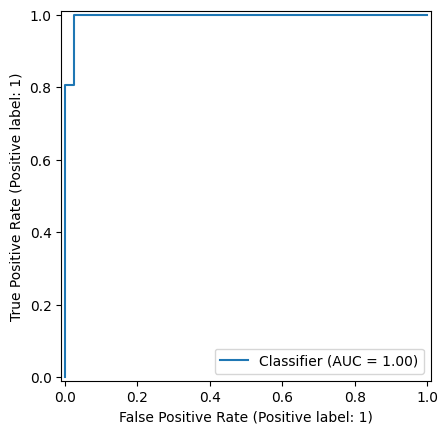

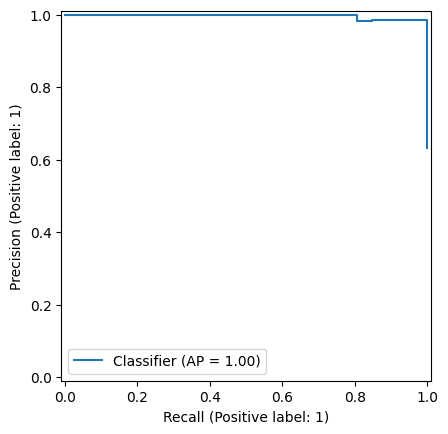

<function matplotlib.pyplot.show(close=None, block=None)>

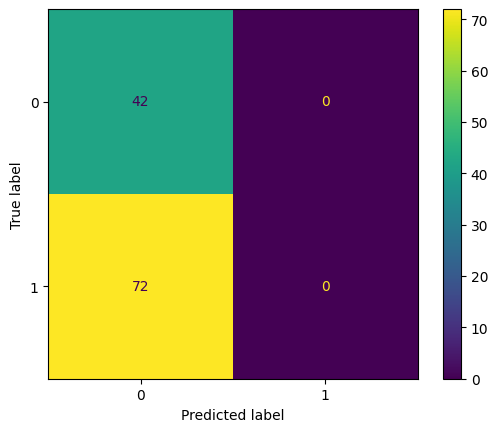

In [10]:
#Plot
RocCurveDisplay.from_predictions(y_test, y_proba)
plt.show()

PrecisionRecallDisplay.from_predictions(y_test, y_proba)
plt.show()

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show

In [12]:
#Save model

import os

os.makedirs("models", exist_ok=True)

joblib.dump(best_model, "models/best_model.joblib")
print("Model saved to models/best_model.joblib")

Model saved to models/best_model.joblib
